# Download US power output PV Watts (version 8) 

## Documentation: https://developer.nrel.gov/docs/api-key/
## https://pvwatts.nrel.gov/downloads/pvwattsv5.pdf

In [1]:
import numpy as np
import scipy as sp
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
hrh_apikey1 = 'GNoTfD5IZWwIEz24zB5Wn0aEhDvNJSep5bwapzTI'
hrh_apikey2 = 'bupvdoNsjaox9hQeCD6yufHWNf4cnM5OTNLlEBlZ'
hrh_apikey3 = 'wfaZg9uNJwCc9zJfiCXTEDnmloDEk0o6EATrdC6A'
hrh_apikey4 = '7iehBlUn3NW7rEEQYvMvB2xsinpbFQAnYGnrFoiy'
hrh_apikey5 =  'HGHXaFdKeMcknyEsmXnFMnL4aqgZK5HuZ5AV0tyG'
hrh_apikey6 = 'vPgwOy4OgMoOpnYtBsK5PyfEMwqD78HXCK5u1sNx'
data_path   = '/Users/hrh/Desktop/AI/erdos/rapower_data/'

In [3]:
# 1. Define PVWatts parameters and your API key
parameters = {
    'format': 'json',
    'system_capacity': 1000,
    'module_type': 0,
    'losses': 14.08,
    'array_type': 1,
    'tilt': 40,
    'azimuth': 180,
    'lat': 40.0099983215332,
    'lon':  -105.2600021362305,
    'dataset': 'nsrdb',
    'radius': 25,
    'timeframe': 'monthly',
    'api_key': hrh_apikey1  # Replace with your API key
}



In [4]:
url = 'https://developer.nrel.gov/api/pvwatts/v8'

# 2. Send request
response = requests.get(url, params=parameters)
data = response.json()

# 3. Convert the output data to a DataFrame
df = pd.DataFrame(data['outputs'])

print(response)

<Response [200]>


In [5]:
##### Try to get data for California on a grid with lat_delta and lon_delta resolution
# lat_delta = 0.25
# lon_delta = 0.25

# # #CONUS box
# # top = 49.3457868 # north lat
# # left = -124.7844079 # west long
# # right = -66.9513812 # east long
# # bottom =  24.7433195 # south lat

# #California box
# top    = 42.009518
# bottom = 32.534156
# left   = -124.409591 
# right  =  -114.131211


## Define list of lat lon coordinates (either for CONUS or California)

<font color ='red'> PVWatts API access currently has a limit of 1000 queries per hour. So, data has to be downloaded one chunk (size<1000) at a time </font>

In [3]:
# 1. Define a list of latitudes and longitudes for CONUS
all_data = []
##### Read lats and lons CA_grid_dataframe #############
data_path2     = '/Users/hrh/Desktop/AI/erdos/SolarFarmPrediction/data/'
ca_gridpath    = data_path2 + 'threshold_90percentile/CA_data_version_11.csv'

df_main             = pd.read_csv(ca_gridpath)
ca_grid0            = df_main.loc[df_main['State']=='CA']
ca_grid0

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


In [4]:
### Remove rows where there is no data for land_cover,slope or elevation
ca_grid = ca_grid0.dropna(subset = ['slope','elevation','land_cover'])
ca_grid

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


In [5]:
#Check if it worked
ca_grid['slope'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
91361    False
91362    False
91363    False
91364    False
91365    False
Name: slope, Length: 91330, dtype: bool

In [6]:
#ca_grid_usable      = ca_grid.loc[ca_grid['land_cover']==1.0]
ca_coords           = list(zip(ca_grid['Latitude'], ca_grid['Longitude']))
#Check if ca_coords are within california grid box
ca_lats = [item[0] for item in ca_coords] 
ca_lons = [item[1] for item in ca_coords]
(min(ca_lats),max(ca_lats)),(min(ca_lons),max(ca_lons))
ca_grid

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


### Reduce the grid points to those with solar farms and a a few sites with no solar farms

In [7]:
solar_farms = ca_grid.loc[ca_grid['Solar_farm_present']==1]
solar_farms

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
16282,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,"JMJJ+R4 Columbia, Redding, CA, USA",1.0,1.0,185.0
16530,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,"6759 Airport Rd, Redding, CA 96002, USA",1.0,0.0,149.0
16672,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,"7PCC+W7 Napa, CA, USA",1.0,1.0,9.0
18742,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,"6WJ4+QW Fairfield, CA, USA",1.0,0.0,10.0
21251,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,"P3GR+8Q Dublin, CA, USA",1.0,2.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85756,35.588119,-115.432945,1.0,CA,5.889066,179.797992,6.0,5.889066,0.0,0.0,"HHP8+27 Calada, CA, USA",1.0,1.0,816.0
85969,33.828249,-115.389800,1.0,CA,14.031455,373.646009,6.0,14.031455,0.0,0.0,"RJ96+C8 Desert Center, CA, USA",1.0,0.0,216.0
89035,33.574045,-114.915204,1.0,CA,0.308603,NaN,3.0,0.308603,0.0,1.0,"H38J+CM Blythe, CA, USA",1.0,1.0,131.0
89164,33.574045,-114.893631,1.0,CA,0.033762,NaN,3.0,0.033762,0.0,1.0,"H38W+3C Blythe, CA, USA",1.0,0.0,133.0


### Let us pick locations where only one feature is restricting:

#### 1) Slope 2) Elevation 3) Land Cover

### The thresholds will be set at 95% percentile of the feature set of existing solar farm locations

In [8]:
slope_threshold       = solar_farms['slope'].quantile(0.95)
elevation_threshold   = solar_farms['elevation'].quantile(0.95)
print(slope_threshold,elevation_threshold)  

7.0 911.8


In [9]:
np.sort(solar_farms['slope'])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3

In [10]:
high_slope = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['slope']>=slope_threshold) &(ca_grid['land_cover']!=0)]
high_slope

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
33,40.437539,-124.407129,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,76.0
57,40.417985,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,270.0
58,40.437539,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,218.0
59,40.457093,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,193.0
60,40.476647,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91356,34.258439,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,160.0
91357,34.277993,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,353.0
91359,34.317101,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,33.0,370.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0


In [11]:
high_elevation = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation']>=elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']!=0)]
high_elevation 

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
1999,41.923652,-123.889387,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1011.0
2359,40.828622,-123.824670,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,977.0
2692,41.395691,-123.781525,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1325.0
2818,40.750405,-123.759952,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1398.0
2970,40.593972,-123.738380,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88585,35.060158,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,976.0
88588,35.118820,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1062.0
88589,35.138374,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1084.0
88597,35.294807,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,994.0


In [12]:
land_cover = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation'] < elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']==0)]
land_cover

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91241,34.551751,-114.397462,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,137.0
91290,34.434426,-114.332745,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,137.0
91354,34.356210,-114.203309,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0
91360,34.336656,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0


### Let us pick locations with low elevation, low slope and no land cover restrictions 

In [16]:
## I am calling these points rad_limited because they are not infeasible due to any other feature considered so far.
rad_limited = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation'] < elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']!=0)]
rad_limited

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
87,40.437539,-124.363984,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,379.0
148,40.300660,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0
163,40.593972,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
164,40.613526,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
186,40.320215,-124.299266,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91342,34.258439,-114.224882,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,261.0
91355,34.238885,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,115.0
91358,34.297547,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,258.0
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0


In [14]:
## Number of locations to be sampled from rad_limited , 800 for each feature slope,elevation and land_cover ##############
radlim_size = 5000 - (len(solar_farms) + 2400)
radlim_size

2397

### Sample points from the dataframes to have a list of 5000 locations and set the labels

In [17]:
## Add extra column called fearture violated 
sample_high_elevation                       = high_elevation.sample(800,random_state=42)
sample_high_elevation['Solar_farm_present'] = 0
sample_high_elevation['feature_violated']   = 'elevation'
sample_high_elevation  

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
61424,36.546270,-118.107942,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1486.0,elevation
36439,41.043717,-120.890802,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1443.0,elevation
56605,37.778180,-118.582538,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2026.0,elevation
63318,37.484868,-117.913789,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1543.0,elevation
57499,37.387097,-118.496248,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1344.0,elevation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50692,41.962760,-120.092617,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1851.0,elevation
40800,41.649894,-120.631931,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1503.0,elevation
59569,37.054677,-118.302095,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1566.0,elevation
34435,41.982314,-121.020237,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1459.0,elevation


In [18]:
sample_land_cover                       = land_cover.sample(800, random_state=42)
sample_land_cover['Solar_farm_present'] = 0
sample_land_cover['feature_violated']   = 'land_cover'
sample_land_cover      

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
98,40.652635,-124.363984,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
60249,33.691370,-118.215805,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
14379,37.875950,-122.465599,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
2148,39.498942,-123.846242,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
4205,38.931872,-123.565799,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,166.0,land_cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,36.702703,-121.861567,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
15530,40.789513,-122.379308,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,312.0,land_cover
91354,34.356210,-114.203309,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0,land_cover
21399,40.613526,-121.904712,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,760.0,land_cover


In [19]:
sample_high_slope                       = high_slope.sample(800, random_state=42)
sample_high_slope['Solar_farm_present'] = 0
sample_high_slope['feature_violated']   = 'slope'
sample_high_slope

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
41607,34.884171,-120.567214,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.0,328.0,slope
13034,39.146968,-122.595034,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.0,599.0,slope
12706,41.161041,-122.638179,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.0,1401.0,slope
45455,40.437539,-120.373061,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,1763.0,slope
59761,36.526716,-118.280523,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.0,3747.0,slope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71367,33.632707,-117.072459,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,475.0,slope
59871,34.473534,-118.258950,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,923.0,slope
7351,41.786773,-123.199066,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,1273.0,slope
1955,41.063271,-123.889387,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17.0,382.0,slope


In [20]:
sample_rad_limited = rad_limited.sample(radlim_size,random_state=42)

### Combine data frames 

In [21]:
ca_grid_sampled = pd.concat([sample_rad_limited,sample_high_elevation,sample_high_slope,solar_farms,sample_land_cover])
ca_grid_sampled

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
23357,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,29.0,NaN
29621,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0,NaN
1031,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,428.0,NaN
82136,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,781.0,NaN
49965,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,509.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
15530,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,312.0,land_cover
91354,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0,land_cover
21399,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,760.0,land_cover


In [22]:
###### Check #############
ca_grid_sampled.loc[ca_grid_sampled['feature_violated']=='slope']

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
41607,34.884171,-120.567214,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.0,328.0,slope
13034,39.146968,-122.595034,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.0,599.0,slope
12706,41.161041,-122.638179,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.0,1401.0,slope
45455,40.437539,-120.373061,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,1763.0,slope
59761,36.526716,-118.280523,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.0,3747.0,slope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71367,33.632707,-117.072459,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,475.0,slope
59871,34.473534,-118.258950,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,923.0,slope
7351,41.786773,-123.199066,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,1273.0,slope
1955,41.063271,-123.889387,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17.0,382.0,slope


In [23]:
#### Get lat and lons 
ca_coords_sample           = list(zip(ca_grid_sampled['Latitude'], ca_grid_sampled['Longitude']))
len(ca_coords_sample )
########
ca_coords_sample1 = ca_coords_sample[0:1000]
ca_coords_sample2 = ca_coords_sample[1000:2000]
ca_coords_sample3 = ca_coords_sample[2000:3000]
ca_coords_sample4 = ca_coords_sample[3000:4000]
ca_coords_sample5 = ca_coords_sample[4000:]
len(ca_coords_sample3)

1000

In [45]:
%%time
df = pd.DataFrame()
for (lat,lon) in ca_coords_sample5:
        
        parameters = {
            'format': 'json',
            'system_capacity': 1000, #1000kW = 1 MW, 1 MW or greater is considered utility-scale
            'module_type': 0,       # 0- Standard module, 1- Permium, 2-Thin film
            'losses': 14,           # Losses in percentage
            'array_type': 0,        # Open Rack: Also known as ground mount.
            'tilt': 40,
            'azimuth': 180,         # This means that the solar array is facing South in the Northeren Hemisphere
            'lat': lat,
            'lon': lon,
            'dataset': 'nsrdb',      #tmy2 is 1960-1990, tmy3 is 1990-2005
            'radius': 100,            # 0-Pick the station nearest to the given (lat,lon),e.g: 50 -50 miles
            'timeframe': 'monthly',
            'api_key': hrh_apikey5
        }

        url = 'https://developer.nrel.gov/api/pvwatts/v8'
        response = requests.get(url, params=parameters)
        data = response.json()
             
        # Extract and append relevant data to the all_data list
        # Extract relevant data
        #print('Processing (lat,lon):',lat,lon,'\n')
        
        # Check if 'outputs' is in the data
        if 'outputs' not in data:
            print(f"No data available for latitude {lat} and longitude {lon}")
            continue

        output_data = data['outputs']
        input_data  = data['inputs']

        output_data['latitude']  = input_data['lat']
        output_data['longitude'] = input_data['lon']
        all_data.append(output_data)
        
        
# Convert all_data to a DataFrame
df = pd.DataFrame(all_data)

print(df)

                                             ac_monthly  \
0     [90124.13525513172, 116500.8249419729, 142042....   
1     [83435.5657723509, 108614.2904883136, 143017.9...   
2     [78206.88536471261, 75419.72299708497, 112392....   
3     [146493.639149292, 145827.290637644, 171213.88...   
4     [111515.6756357151, 113526.884078058, 158439.8...   
...                                                 ...   
4995  [103748.5975009087, 109316.9939753222, 135273....   
4996  [88884.21123100286, 81922.54581368579, 117951....   
4997  [124837.9431145389, 125771.4037536173, 153395....   
4998  [79069.93940232327, 88855.35885862306, 121174....   
4999  [72328.4902150864, 70386.21362105546, 111765.3...   

                                            poa_monthly  \
0     [109.4070110823117, 145.701977658052, 180.3936...   
1     [102.732582454375, 135.8822980955997, 182.3777...   
2     [97.75660918743236, 95.07804802691463, 143.615...   
3     [180.0111042703568, 181.4365533782946, 219.059...

In [46]:
df

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,5.759949,18.506846,38.09104551600086,-121.75370434396667
1,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06,5.847310,18.642218,38.38435723225037,-121.32225320345118
2,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,5.228260,16.600379,40.22244398741397,-124.06196794572456
3,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,6.651584,21.185313,34.766846065173084,-115.90754138998176
4,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,6.271572,19.880964,35.56856475625507,-120.1141900100078
...,...,...,...,...,...,...,...,...,...
4995,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,5.141176,16.713396,36.70270339241985,-121.86156712909552
4996,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,5.430239,16.361704,40.78951330549636,-122.37930849771412
4997,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,6.219317,19.481203,34.356209662423765,-114.20330938494556
4998,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,5.447233,17.078452,40.61352627574665,-121.90471224314707


In [47]:
# Save file in the appropriate threshold folder
threshold_path = data_path2 + 'threshold_95percentile/'
df.to_csv(threshold_path +'nsrdb_monthly_chunk5.csv',index=False)

In [48]:
df_check = pd.read_csv(threshold_path +'nsrdb_monthly_chunk5.csv')
df_check

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,5.759949,18.506846,38.091046,-121.753704
1,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06,5.847310,18.642218,38.384357,-121.322253
2,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,5.228260,16.600379,40.222444,-124.061968
3,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,6.651584,21.185313,34.766846,-115.907541
4,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,6.271572,19.880964,35.568565,-120.114190
...,...,...,...,...,...,...,...,...,...
4995,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,5.141176,16.713396,36.702703,-121.861567
4996,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,5.430239,16.361704,40.789513,-122.379308
4997,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,6.219317,19.481203,34.356210,-114.203309
4998,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,5.447233,17.078452,40.613526,-121.904712


In [49]:
# df0 = df.drop_duplicates(subset=['latitude','longitude'])
# df0

In [50]:
df_check.to_csv(threshold_path +'nsrdb_monthly.csv',index=False)

In [51]:
# ca_rad1 = pd.read_csv(data_path2+'nsrdb_monthly_chunk1.csv')
ca_rad = pd.read_csv(threshold_path +'nsrdb_monthly.csv')
ca_rad

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,5.759949,18.506846,38.091046,-121.753704
1,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06,5.847310,18.642218,38.384357,-121.322253
2,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,5.228260,16.600379,40.222444,-124.061968
3,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,6.651584,21.185313,34.766846,-115.907541
4,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,6.271572,19.880964,35.568565,-120.114190
...,...,...,...,...,...,...,...,...,...
4995,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,5.141176,16.713396,36.702703,-121.861567
4996,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,5.430239,16.361704,40.789513,-122.379308
4997,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,6.219317,19.481203,34.356210,-114.203309
4998,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,5.447233,17.078452,40.613526,-121.904712


In [52]:
# Convert DataFrame to GeoDataFrame
geometry       = [Point(xy) for xy in zip(ca_rad['longitude'], ca_rad['latitude'])]
geo_df_rad     = gpd.GeoDataFrame(ca_rad, geometry=geometry,crs = "EPSG:4326")

EPSG:4326


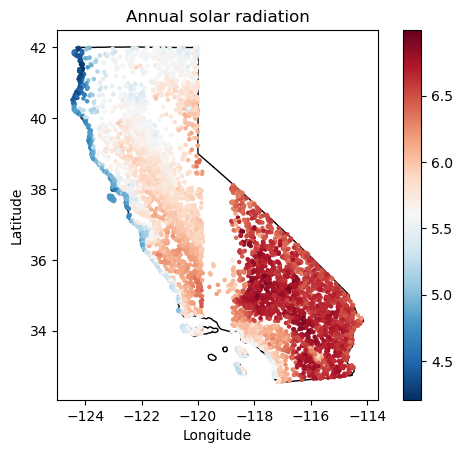

In [53]:
# Load the California shapefile
ca_shapfile_path = data_path+ 'ca_state_boundary/CA_State_TIGER2016.shp'
ca_shape         = gpd.read_file(ca_shapfile_path)
ca_shape         = ca_shape.to_crs("EPSG:4326")
print(ca_shape.crs)


# Plot the county boundaries
fig, ax = plt.subplots()
ca_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot solar_rad data on top of the county boundaries
geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=5, cmap='RdBu_r',  missing_kwds={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })


# geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=50, cmap='OrRd', alpha=0.5)

# Add titles and labels as needed
plt.title("Annual solar radiation")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

EPSG:4326


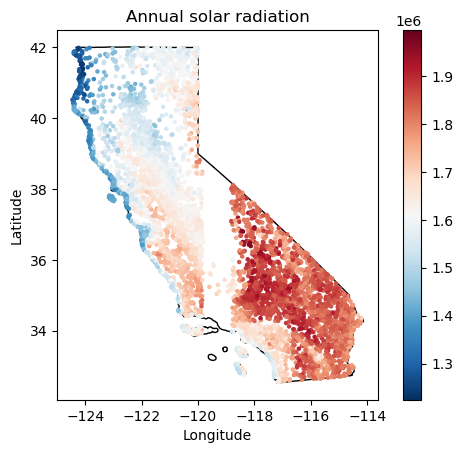

In [54]:
# Load the California shapefile
ca_shapfile_path = data_path+ 'ca_state_boundary/CA_State_TIGER2016.shp'
ca_shape         = gpd.read_file(ca_shapfile_path)
ca_shape         = ca_shape.to_crs("EPSG:4326")
print(ca_shape.crs)


# Plot the county boundaries
fig, ax = plt.subplots()
ca_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot solar_rad data on top of the county boundaries
geo_df_rad.plot(ax=ax, column='ac_annual', legend=True, markersize=5, cmap='RdBu_r',  missing_kwds={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })


# geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=50, cmap='OrRd', alpha=0.5)

# Add titles and labels as needed
plt.title("Annual solar radiation")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

## Add data to big dataframe

#### Find threshold for ac_annual. Exclude the bottom 5% 

In [55]:
ac_annual_threshold = geo_df_rad['ac_annual'].quantile(q=0.05)
ac_annual_threshold 

1429021.3742810637

In [56]:
# Ensure both GeoDataFrames have the same CRS
# Convert ca_features to a GeoDataFrame
gdf_ca_features = gpd.GeoDataFrame(
    ca_grid_sampled, 
    geometry=gpd.points_from_xy(ca_grid_sampled.Longitude, ca_grid_sampled.Latitude),
    crs="EPSG:4326"
)

# Ensure ca_rad is a GeoDataFrame with the same CRS
gdf_ca_rad = gpd.GeoDataFrame(
    ca_rad,
    geometry=gpd.points_from_xy(ca_rad.longitude, ca_rad.latitude),
    crs="EPSG:4326"
)

# Reproject to a suitable projected CRS for accurate distance calculations
gdf_ca_features = gdf_ca_features.to_crs("EPSG:3310")
gdf_ca_rad      = gdf_ca_rad.to_crs("EPSG:3310")


In [57]:
# Perform the spatial join to find the nearest neighbors and get their 'elevation'
ca_features_with_solar_data = gpd.sjoin_nearest(gdf_ca_features, gdf_ca_rad[['geometry', 'solrad_annual','ac_monthly', 'poa_monthly', 'solrad_monthly','dc_monthly','ac_annual']],\
                                                how='left', distance_col='distance')
ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,feature_violated,geometry,index_right,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,distance
23357,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-153600.393 9722.522),0,5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,0.0
29621,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-115359.280 41711.981),1,5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06,0.0
1031,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-345538.673 252569.484),2,5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,0.0
82136,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (374291.513 -352993.103),3,6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,0.0
49965,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-10339.638 -272039.745),4,6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-166076.353 -144396.270),4995,5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,0.0
15530,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-200860.954 310656.799),4996,5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,0.0
91354,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (532777.478 -390355.413),4997,6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,0.0
21399,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-161194.164 290216.828),4998,5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,0.0


In [58]:


# If you don't need the distance information, drop the 'distance' column
ca_features_with_solar_data.drop(columns=['index_right', 'distance',], inplace=True)

# Optionally, project back to geographic CRS if needed for other purposes
ca_features_with_solar_data = ca_features_with_solar_data.to_crs("EPSG:4326")

ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
23357,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,29.0,NaN,POINT (-121.75370 38.09105),5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06
29621,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.0,NaN,POINT (-121.32225 38.38436),5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06
1031,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,428.0,NaN,POINT (-124.06197 40.22244),5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06
82136,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,781.0,NaN,POINT (-115.90754 34.76685),6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06
49965,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,509.0,NaN,POINT (-120.11419 35.56856),6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,POINT (-121.86157 36.70270),5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06
15530,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,312.0,land_cover,POINT (-122.37931 40.78951),5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06
91354,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,138.0,land_cover,POINT (-114.20331 34.35621),6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06
21399,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,760.0,land_cover,POINT (-121.90471 40.61353),5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06


In [59]:
##Set value where ac_annual is below threshold
ac_annual_low   = (ca_features_with_solar_data['ac_annual']<=ac_annual_threshold) & (ca_features_with_solar_data['Solar_farm_present']!=1) \
& (ca_features_with_solar_data['elevation'] < elevation_threshold) \
& (ca_features_with_solar_data['slope']<slope_threshold) & (ca_features_with_solar_data['land_cover']!=0)

ca_features_with_solar_data.loc[ac_annual_low,'Solar_farm_present']=0
ca_features_with_solar_data.loc[ac_annual_low,'feature_violated']='ac_annual'
ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
23357,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,29.0,NaN,POINT (-121.75370 38.09105),5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06
29621,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.0,NaN,POINT (-121.32225 38.38436),5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06
1031,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,428.0,NaN,POINT (-124.06197 40.22244),5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06
82136,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,781.0,NaN,POINT (-115.90754 34.76685),6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06
49965,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,509.0,NaN,POINT (-120.11419 35.56856),6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,POINT (-121.86157 36.70270),5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06
15530,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,312.0,land_cover,POINT (-122.37931 40.78951),5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06
91354,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,138.0,land_cover,POINT (-114.20331 34.35621),6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06
21399,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,760.0,land_cover,POINT (-121.90471 40.61353),5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06


In [60]:
ca_features_with_solar_data.loc[ca_features_with_solar_data['Solar_farm_present'].isna()]

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
23357,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,29.0,NaN,POINT (-121.75370 38.09105),5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06
29621,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.0,NaN,POINT (-121.32225 38.38436),5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06
1031,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,428.0,NaN,POINT (-124.06197 40.22244),5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06
82136,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,781.0,NaN,POINT (-115.90754 34.76685),6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06
49965,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,509.0,NaN,POINT (-120.11419 35.56856),6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51216,36.565825,-120.049472,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,56.0,NaN,POINT (-120.04947 36.56582),5.867308,"[88705.03548243521, 104993.4099350208, 140928....","[110.4826613672313, 133.1138258655531, 180.958...","[3.563956818297785, 4.754065209484038, 5.83736...","[93214.48448014839, 110050.2928077767, 147703....",1.617768e+06
29008,39.107859,-121.365398,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,49.0,NaN,POINT (-121.36540 39.10786),5.631524,"[87033.46581800569, 92617.43109933444, 123316....","[109.7004375543584, 118.1904246533911, 158.724...","[3.538723792076078, 4.221086594763968, 5.12016...","[91471.88257045779, 97215.90660282622, 129330....",1.545415e+06
19298,38.814548,-122.055720,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,96.0,NaN,POINT (-122.05572 38.81455),5.924873,"[96414.51737882798, 112596.7772093018, 140056....","[117.2142063452531, 140.6119428749669, 178.900...","[3.781103430492034, 5.021855102677388, 5.77099...","[101116.2209333199, 118084.8453466683, 146717....",1.641592e+06
81089,34.962387,-116.036977,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,590.0,NaN,POINT (-116.03697 34.96238),6.665109,"[142656.8279840337, 142501.3835318159, 169337....","[174.3823251641855, 178.1957409140169, 218.564...","[5.625236295618888, 6.364133604072031, 7.05048...","[149274.2592721478, 149431.7401296937, 177357....",1.843648e+06


### Finally, save this data as a CSV file

In [61]:
ca_features_with_solar_data.drop(columns='geometry').to_csv(threshold_path +'ca_data_version_1.csv', index=False)

In [62]:
ca_features_with_solar_data_check = pd.read_csv(threshold_path +'ca_data_version_1.csv')
ca_features_with_solar_data_check 

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
0,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,29.0,NaN,5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06
1,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,14.0,NaN,5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06
2,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,428.0,NaN,5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06
3,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,781.0,NaN,6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06
4,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,509.0,NaN,6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,land_cover,5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06
4996,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,312.0,land_cover,5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06
4997,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,138.0,land_cover,6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06
4998,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,760.0,land_cover,5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06


In [63]:
ca_features_with_solar_data_check.loc[(ca_features_with_solar_data_check['feature_violated']=='ac_annual')]

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
73,40.887284,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,338.0,ac_annual,5.349295,"[84661.176987843, 72649.76035786551, 112735.47...","[107.344308825593, 93.30063299561172, 148.4914...","[3.462719639535258, 3.33216546412899, 4.790047...","[88903.35826170366, 76482.4797303436, 118322.3...",1.416788e+06
429,38.345249,-123.048058,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,55.0,ac_annual,5.000902,"[95251.16728585993, 92746.74645238271, 126798....","[117.2199461552818, 115.4155876117971, 159.990...","[3.781288585654251, 4.121985271849898, 5.16096...","[99883.8516620315, 97371.09755991657, 133015.8...",1.424107e+06
479,40.574418,-124.277694,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,30.0,ac_annual,4.403701,"[73448.76435798961, 79241.73641970158, 105322....","[88.63520832504797, 96.47753950744588, 129.327...","[2.859200268549935, 3.44562641098021, 4.171856...","[77277.35915734345, 83331.91284774637, 110855....",1.290373e+06
685,41.943206,-124.191403,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,9.0,ac_annual,4.529718,"[70634.4571220917, 74999.48557192499, 107318.9...","[86.12007657430543, 92.21117154707214, 134.948...","[2.778066986267917, 3.293256126681148, 4.35319...","[74330.5404116393, 78906.3577613249, 112761.05...",1.300709e+06
893,41.786773,-124.169831,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,14.0,ac_annual,4.532985,"[74080.01886087465, 83956.21224007859, 111759....","[90.21421909375492, 103.155782057686, 139.4180...","[2.910136099798546, 3.684135073488784, 4.49735...","[77912.77623924031, 88195.80216163212, 117343....",1.300555e+06
936,40.554864,-124.061968,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,49.0,ac_annual,4.735820,"[73106.16998056912, 75692.31028424249, 108600....","[92.10450196826223, 96.20279617399441, 140.759...","[2.971112966718136, 3.435814149071229, 4.54062...","[76920.56376349935, 79661.87140140476, 114020....",1.304248e+06
1170,37.445760,-122.444026,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,13.0,ac_annual,4.757011,"[94483.09888706701, 93522.89481703547, 136929....","[114.922840336731, 114.7093634108351, 171.3068...","[3.707188397959063, 4.096762978958398, 5.52602...","[99124.72382752932, 98172.73376355604, 143459....",1.383972e+06
1259,41.943206,-123.954105,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,837.0,ac_annual,5.049140,"[74171.27403892709, 69227.35397003817, 110439....","[91.6252362345115, 87.66736374212876, 142.8261...","[2.955652781758435, 3.130977276504598, 4.60729...","[78027.13959462152, 72920.15155092515, 115931....",1.375733e+06
1734,41.708557,-123.846242,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,567.0,ac_annual,4.935667,"[75568.38281261541, 72591.3961077208, 88725.32...","[93.50086061785855, 92.10916205778115, 114.731...","[3.016156794124469, 3.289612930635041, 3.70102...","[79473.26044280309, 76411.67843452952, 93396.7...",1.350175e+06
1981,40.809067,-123.479509,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,470.0,ac_annual,5.243949,"[77845.82990680351, 87115.54371131006, 114741....","[97.75403842946028, 111.0605638796918, 149.273...","[3.153356078369686, 3.966448709988993, 4.81528...","[81840.7355208932, 91489.67264731014, 120398.0...",1.414644e+06


In [64]:
ca_features_with_solar_data_check['feature_violated']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4995    land_cover
4996    land_cover
4997    land_cover
4998    land_cover
4999    land_cover
Name: feature_violated, Length: 5000, dtype: object